# Prepare the dataset
## Load the dataset

In [67]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset from csv files
full_dataset = pd.read_csv("../output_full.csv", header=0, usecols=[*range(1,23)], sep=";") 
full_dataset.dropna(axis = 0, inplace = True)
print("The shape of the full dataset: " + str(full_dataset.shape))

full_dataset.head()

# Set of features in the dataset
features = list(full_dataset.columns)
print("Features: " + str(features[:-1]))

The shape of the full dataset: (382, 22)
Features: ['session_time', '%tcp_protocol', '%udp_protocol', 'ul_data_volume', 'max_ul_volume', 'min_ul_volume', 'avg_ul_volume', 'std_ul_volume', '%ul_volume', 'dl_data_volume', 'max_dl_volume', 'min_dl_volume', 'avg_dl_volume', 'std_dl_volume', '%dl_volume', 'nb_uplink_packet', 'nb_downlink_packet', 'ul_packet', 'dl_packet', 'kB/s', 'nb_packet/s']


## Split the dataset

In [68]:
y_df = full_dataset['output'].to_frame()
X_df = full_dataset[full_dataset.columns.difference(['output'])]

X_train, X_test, y_train_orig, y_test_orig = train_test_split(X_df, y_df, train_size=0.7, random_state=1)

print("Shape of the training dataset: " + str(X_train.shape) + ", " + str(y_train_orig.shape))
print("Shape of the testing dataset: " + str(X_test.shape) + ", " + str(y_test_orig.shape))

Shape of the training dataset: (267, 21), (267, 1)
Shape of the testing dataset: (115, 21), (115, 1)


## Standardize the data

In [69]:
# Convert the expected output into arrays, e.g., 1 -> [1,0,0], 2 -> [0,1,0], 3 -> [0,0,1]
output_train = []
output_test = []
prep_outputs = [[1,0,0], [0,1,0], [0,0,1]]

for i, row in y_train_orig.iterrows():
    output_train.append(prep_outputs[row["output"] - 1])

for i, row in y_test_orig.iterrows():
    output_test.append(prep_outputs[row["output"] - 1])

#print(output_train)
#print(output_test)

# Preprocessing the data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training/testing dataset.
X_train = scaler.transform(X_train)
y_train = np.array(output_train)

X_test = scaler.transform(X_test)
y_test = np.array(output_test)

print("Preprocessed inputs of the training dataset: " + str(X_train))
print("Preprocessed outputs of the training dataset: " + str(y_train))

Preprocessed inputs of the training dataset: [[ 0.40310383  0.61537023 -0.61225118 ... -0.58965678  0.28827675
  -0.08411543]
 [ 0.41846312  0.62066609 -0.61757611 ... -0.66028423  2.01161531
  -0.31239553]
 [ 0.43164913 -1.64424109  1.65976663 ...  0.39726536 -0.42072285
  -1.8764641 ]
 ...
 [ 0.42968402  0.6217908  -0.618707   ... -0.77538956  2.14987773
  -0.52495422]
 [ 0.31052436  0.6098192  -0.60666967 ... -0.58713875 -0.32611096
   0.55363115]
 [ 0.40674732  0.61766645 -0.61456    ... -0.64695013  1.47239399
  -0.03926074]]
Preprocessed outputs of the training dataset: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1

# K-Means Clustering

## Elbow method

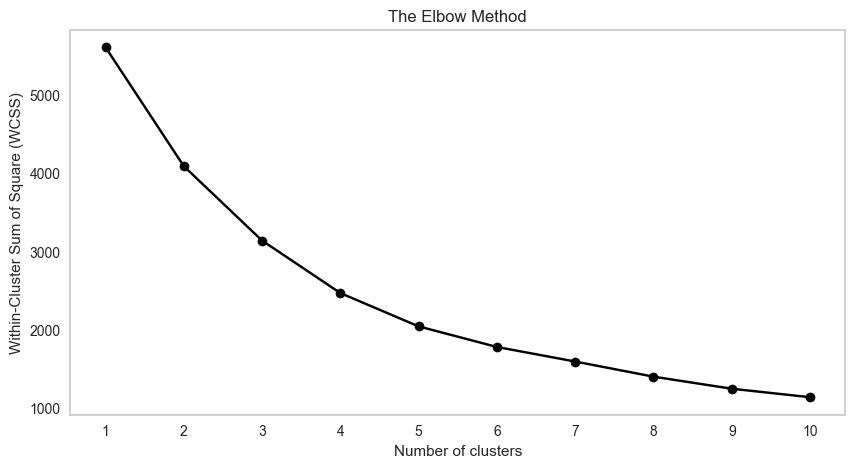

In [127]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

x = [i for i in range(1, 11)]
plt.figure(figsize=(10,5))
plt.grid(b=None)
plt.plot(x, wcss, marker='o', color='black')
plt.title('The Elbow Method')
plt.xticks(x)
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()

Elbow Method to determine the number of clusters to be formed:


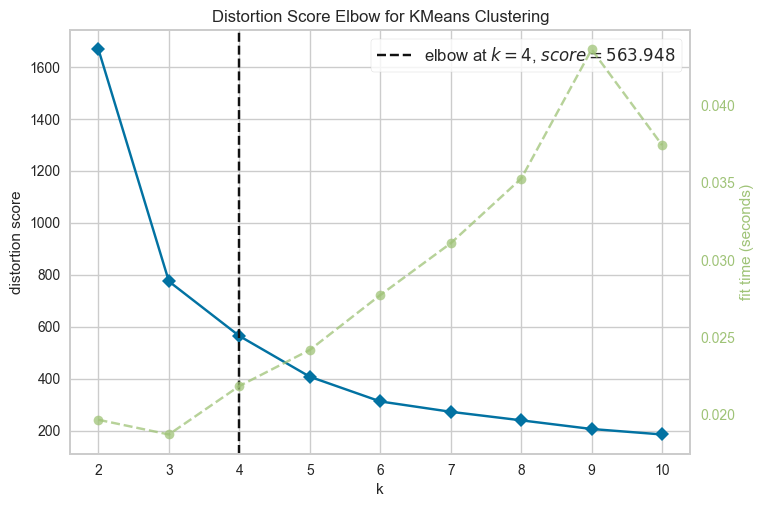

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#Initiating PCA to reduce dimensions aka features to 2
pca = PCA(n_components=2)
pca.fit(X_train)
PCA_ds = pd.DataFrame(pca.transform(X_train), columns=(["col1","col2"]))
PCA_ds.describe().T

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

## Extracting centroids

Centers found by scikit-learn: 
[[ 0.29603499  0.55302078 -0.55434449 -0.29603499  0.31634158 -0.38477373
  -0.44294479 -0.27145448 -0.06250286  0.14197423 -0.34944815  0.01097793
  -0.36051828 -0.50460826 -0.12815785 -0.44271595 -0.68261502  0.38090609
  -0.27471179 -0.54885026  0.27145448]
 [-1.01160107 -1.7045148   1.70452505  1.01160107 -0.68252599  1.30929006
  -0.46754101  0.28087428 -0.4945401  -0.7639534   1.18747047 -0.06266221
   1.11500886 -0.33506525 -0.66145001 -0.5147201   0.7466831  -0.68223322
   1.15715742 -0.03681117 -0.28087428]
 [ 0.42344967  0.57654359 -0.57321136 -0.42344967 -0.00888547 -0.54396011
   1.66038169  0.36055689  0.73052734  0.52590589 -0.49214943  0.04482251
  -0.38027985  1.6627701   1.08965667  1.71443198  0.85992068 -0.17233482
  -0.64585775  1.42919255 -0.36055689]]


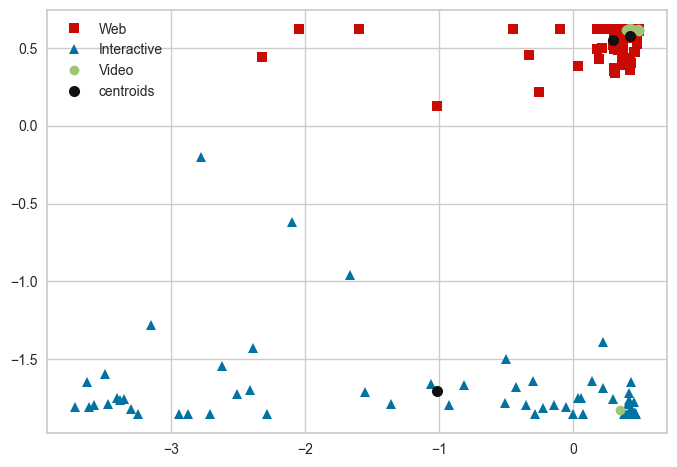

In [87]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

n_clusters = 3
k_means = KMeans(n_clusters=n_clusters)
kmeans_model = k_means.fit(X_train)

centroids = k_means.cluster_centers_
labels = k_means.labels_

print('Centers found by scikit-learn: \n' + str(centroids))

plt.figure()
plt.plot(X_train[labels==0,0],X_train[labels==0,1],'rs', label='Web')
plt.plot(X_train[labels==1,0],X_train[labels==1,1],'b^', label='Interactive')
plt.plot(X_train[labels==2,0],X_train[labels==2,1],'go', label='Video')

plt.plot(centroids[:,0],centroids[:,1],'ko',markersize=8, label='centroids')

plt.legend(loc='best')
plt.show()

# Keras model
## Training the Keras model

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Keras model
keras_model = Sequential()
keras_model.add(Dense(12, input_shape=(21,), activation='relu'))
keras_model.add(Dense(8, activation='relu'))
keras_model.add(Dense(3, activation='sigmoid'))

# Compile the Keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Keras model on the dataset
keras_model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate the Keras model
_, accuracy = keras_model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
27/27 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6667
Epoch 2/150
27/27 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.8127
Epoch 3/150
27/27 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8165
Epoch 4/150
27/27 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7940
Epoch 5/150
27/27 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.7865
Epoch 6/150
27/27 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.7865
Epoch 7/150
27/27 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.7865
Epoch 8/150
27/27 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.7865
Epoch 9/150
27/27 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.7865
Epoch 10/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.8015
Epoch 11/

## Testing the Keras model

4/4 [==============================] - 0s 3ms/step
Confusion matrix: 
[[93  0  1]
 [ 1 10  0]
 [ 3  0  7]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      0.91      0.95        11
           2       0.78      0.70      0.74        10

   micro avg       0.96      0.96      0.96       115
   macro avg       0.92      0.87      0.89       115
weighted avg       0.96      0.96      0.96       115
 samples avg       0.95      0.96      0.95       115


Accuracy: 0.95



Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


Text(0.5, 1.0, 'Confusion Matrix of Keras')

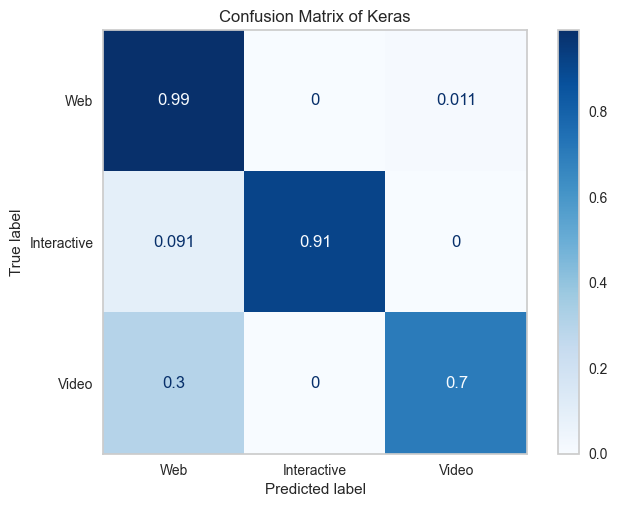

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

y_pred = (keras_model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix: \n" + str(cm))
print(classification_report(y_test, y_pred))
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

labels = ["Web", "Interactive", "Video"]
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
disp.ax_.set_title("Confusion Matrix of Keras")

## XAI of the Keras model
### SHAP method using KernelExplainer

4/4 [==============================] - 0s 1ms/step


Using 115 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/115 [00:00<?, ?it/s]

414/414 [==============================] - 0s 909us/step


  1%|          | 1/115 [00:00<01:42,  1.12it/s]

414/414 [==============================] - 0s 743us/step


  2%|▏         | 2/115 [00:01<01:25,  1.33it/s]

414/414 [==============================] - 0s 743us/step


  3%|▎         | 3/115 [00:02<01:20,  1.39it/s]

414/414 [==============================] - 0s 789us/step


  3%|▎         | 4/115 [00:02<01:19,  1.40it/s]

414/414 [==============================] - 0s 723us/step


  4%|▍         | 5/115 [00:03<01:16,  1.43it/s]

414/414 [==============================] - 0s 742us/step


  5%|▌         | 6/115 [00:04<01:13,  1.47it/s]

414/414 [==============================] - 0s 701us/step


  6%|▌         | 7/115 [00:04<01:11,  1.51it/s]

414/414 [==============================] - 0s 724us/step


  7%|▋         | 8/115 [00:05<01:10,  1.52it/s]

414/414 [==============================] - 0s 721us/step


  8%|▊         | 9/115 [00:06<01:08,  1.54it/s]

414/414 [==============================] - 0s 702us/step


  9%|▊         | 10/115 [00:06<01:07,  1.55it/s]

414/414 [==============================] - 0s 725us/step


 10%|▉         | 11/115 [00:07<01:08,  1.53it/s]

414/414 [==============================] - 0s 741us/step


 10%|█         | 12/115 [00:08<01:07,  1.53it/s]

414/414 [==============================] - 0s 722us/step


 11%|█▏        | 13/115 [00:08<01:05,  1.55it/s]

414/414 [==============================] - 0s 727us/step


 12%|█▏        | 14/115 [00:09<01:04,  1.56it/s]

414/414 [==============================] - 0s 786us/step


 13%|█▎        | 15/115 [00:10<01:07,  1.48it/s]

414/414 [==============================] - 0s 768us/step


 14%|█▍        | 16/115 [00:10<01:09,  1.42it/s]

414/414 [==============================] - 0s 858us/step


 15%|█▍        | 17/115 [00:11<01:10,  1.39it/s]

414/414 [==============================] - 0s 677us/step


 16%|█▌        | 18/115 [00:12<01:07,  1.44it/s]

414/414 [==============================] - 0s 746us/step


 17%|█▋        | 19/115 [00:12<01:06,  1.45it/s]

414/414 [==============================] - 0s 677us/step


 17%|█▋        | 20/115 [00:13<01:03,  1.49it/s]

414/414 [==============================] - 0s 712us/step


 18%|█▊        | 21/115 [00:14<01:02,  1.50it/s]

414/414 [==============================] - 0s 662us/step


 19%|█▉        | 22/115 [00:14<01:00,  1.53it/s]

414/414 [==============================] - 0s 649us/step


 20%|██        | 23/115 [00:15<00:58,  1.57it/s]

414/414 [==============================] - 0s 658us/step


 21%|██        | 24/115 [00:16<00:56,  1.61it/s]

414/414 [==============================] - 0s 649us/step


 22%|██▏       | 25/115 [00:16<00:55,  1.63it/s]

414/414 [==============================] - 0s 743us/step


 23%|██▎       | 26/115 [00:17<00:55,  1.60it/s]

414/414 [==============================] - 0s 705us/step


 23%|██▎       | 27/115 [00:17<00:54,  1.61it/s]

414/414 [==============================] - 0s 668us/step


 24%|██▍       | 28/115 [00:18<00:53,  1.62it/s]

414/414 [==============================] - 1s 2ms/step


 25%|██▌       | 29/115 [00:20<01:18,  1.10it/s]

414/414 [==============================] - 0s 829us/step


 26%|██▌       | 30/115 [00:20<01:13,  1.16it/s]

414/414 [==============================] - 0s 927us/step


 27%|██▋       | 31/115 [00:21<01:10,  1.19it/s]

414/414 [==============================] - 1s 1ms/step


 28%|██▊       | 32/115 [00:22<01:12,  1.14it/s]

414/414 [==============================] - 0s 1ms/step


 29%|██▊       | 33/115 [00:23<01:12,  1.13it/s]

414/414 [==============================] - 0s 883us/step


 30%|██▉       | 34/115 [00:24<01:09,  1.17it/s]

414/414 [==============================] - 0s 733us/step


 30%|███       | 35/115 [00:24<01:03,  1.26it/s]

414/414 [==============================] - 0s 716us/step


 31%|███▏      | 36/115 [00:25<00:58,  1.34it/s]

414/414 [==============================] - 0s 653us/step


 32%|███▏      | 37/115 [00:26<00:55,  1.42it/s]

414/414 [==============================] - 0s 717us/step


 33%|███▎      | 38/115 [00:26<00:54,  1.42it/s]

414/414 [==============================] - 0s 817us/step


 34%|███▍      | 39/115 [00:27<00:55,  1.38it/s]

414/414 [==============================] - 0s 843us/step


 35%|███▍      | 40/115 [00:28<00:54,  1.37it/s]

414/414 [==============================] - 0s 894us/step


 36%|███▌      | 41/115 [00:29<00:54,  1.37it/s]

414/414 [==============================] - 0s 936us/step


 37%|███▋      | 42/115 [00:29<00:54,  1.33it/s]

414/414 [==============================] - 0s 816us/step


 37%|███▋      | 43/115 [00:30<00:54,  1.32it/s]

414/414 [==============================] - 0s 808us/step


 38%|███▊      | 44/115 [00:31<00:54,  1.30it/s]

414/414 [==============================] - 0s 748us/step


 39%|███▉      | 45/115 [00:32<00:51,  1.36it/s]

414/414 [==============================] - 0s 734us/step


 40%|████      | 46/115 [00:32<00:48,  1.42it/s]

414/414 [==============================] - 0s 768us/step


 41%|████      | 47/115 [00:33<00:47,  1.45it/s]

414/414 [==============================] - 0s 774us/step


 42%|████▏     | 48/115 [00:34<00:46,  1.46it/s]

414/414 [==============================] - 0s 707us/step


 43%|████▎     | 49/115 [00:34<00:44,  1.48it/s]

414/414 [==============================] - 0s 720us/step


 43%|████▎     | 50/115 [00:35<00:43,  1.51it/s]

414/414 [==============================] - 0s 727us/step


 44%|████▍     | 51/115 [00:36<00:41,  1.53it/s]

414/414 [==============================] - 0s 719us/step


 45%|████▌     | 52/115 [00:36<00:40,  1.55it/s]

414/414 [==============================] - 0s 790us/step


 46%|████▌     | 53/115 [00:37<00:40,  1.53it/s]

414/414 [==============================] - 0s 802us/step


 47%|████▋     | 54/115 [00:38<00:40,  1.50it/s]

414/414 [==============================] - 0s 741us/step


 48%|████▊     | 55/115 [00:38<00:39,  1.52it/s]

414/414 [==============================] - 0s 756us/step


 49%|████▊     | 56/115 [00:39<00:38,  1.52it/s]

414/414 [==============================] - 0s 768us/step


 50%|████▉     | 57/115 [00:40<00:38,  1.51it/s]

414/414 [==============================] - 0s 761us/step


 50%|█████     | 58/115 [00:40<00:37,  1.51it/s]

414/414 [==============================] - 0s 758us/step


 51%|█████▏    | 59/115 [00:41<00:37,  1.50it/s]

414/414 [==============================] - 0s 831us/step


 52%|█████▏    | 60/115 [00:42<00:37,  1.48it/s]

414/414 [==============================] - 0s 796us/step


 53%|█████▎    | 61/115 [00:42<00:36,  1.48it/s]

414/414 [==============================] - 0s 790us/step


 54%|█████▍    | 62/115 [00:43<00:36,  1.47it/s]

414/414 [==============================] - 0s 779us/step


 55%|█████▍    | 63/115 [00:44<00:35,  1.47it/s]

414/414 [==============================] - 0s 714us/step


 56%|█████▌    | 64/115 [00:44<00:33,  1.51it/s]

414/414 [==============================] - 0s 724us/step


 57%|█████▋    | 65/115 [00:45<00:33,  1.50it/s]

414/414 [==============================] - 0s 955us/step


 57%|█████▋    | 66/115 [00:46<00:35,  1.40it/s]

414/414 [==============================] - 0s 720us/step


 58%|█████▊    | 67/115 [00:46<00:33,  1.44it/s]

414/414 [==============================] - 0s 806us/step


 59%|█████▉    | 68/115 [00:47<00:33,  1.42it/s]

414/414 [==============================] - 0s 674us/step


 60%|██████    | 69/115 [00:48<00:31,  1.48it/s]

414/414 [==============================] - 0s 549us/step


 61%|██████    | 70/115 [00:48<00:28,  1.56it/s]

414/414 [==============================] - 0s 827us/step


 62%|██████▏   | 71/115 [00:49<00:29,  1.51it/s]

414/414 [==============================] - 0s 680us/step


 63%|██████▎   | 72/115 [00:50<00:28,  1.53it/s]

414/414 [==============================] - 0s 765us/step


 63%|██████▎   | 73/115 [00:50<00:28,  1.49it/s]

414/414 [==============================] - 0s 826us/step


 64%|██████▍   | 74/115 [00:51<00:28,  1.44it/s]

414/414 [==============================] - 0s 851us/step


 65%|██████▌   | 75/115 [00:52<00:28,  1.39it/s]

414/414 [==============================] - 0s 560us/step


 66%|██████▌   | 76/115 [00:52<00:26,  1.49it/s]

414/414 [==============================] - 0s 629us/step


 67%|██████▋   | 77/115 [00:53<00:24,  1.53it/s]

414/414 [==============================] - 0s 655us/step


 68%|██████▊   | 78/115 [00:54<00:23,  1.58it/s]

414/414 [==============================] - 0s 763us/step


 69%|██████▊   | 79/115 [00:54<00:23,  1.53it/s]

414/414 [==============================] - 0s 659us/step


 70%|██████▉   | 80/115 [00:55<00:22,  1.57it/s]

414/414 [==============================] - 0s 548us/step


 70%|███████   | 81/115 [00:55<00:20,  1.65it/s]

414/414 [==============================] - 0s 555us/step


 71%|███████▏  | 82/115 [00:56<00:19,  1.71it/s]

414/414 [==============================] - 0s 546us/step


 72%|███████▏  | 83/115 [00:57<00:18,  1.77it/s]

414/414 [==============================] - 0s 684us/step


 73%|███████▎  | 84/115 [00:57<00:19,  1.63it/s]

414/414 [==============================] - 0s 749us/step


 74%|███████▍  | 85/115 [00:58<00:18,  1.62it/s]

414/414 [==============================] - 0s 540us/step


 75%|███████▍  | 86/115 [00:58<00:17,  1.69it/s]

414/414 [==============================] - 0s 580us/step


 76%|███████▌  | 87/115 [00:59<00:16,  1.72it/s]

414/414 [==============================] - 0s 672us/step


 77%|███████▋  | 88/115 [01:00<00:16,  1.68it/s]

414/414 [==============================] - 0s 540us/step


 77%|███████▋  | 89/115 [01:00<00:14,  1.76it/s]

414/414 [==============================] - 0s 624us/step


 78%|███████▊  | 90/115 [01:01<00:14,  1.75it/s]

414/414 [==============================] - 0s 659us/step


 79%|███████▉  | 91/115 [01:01<00:14,  1.70it/s]

414/414 [==============================] - 1s 2ms/step


 80%|████████  | 92/115 [01:02<00:17,  1.31it/s]

414/414 [==============================] - 1s 1ms/step


 81%|████████  | 93/115 [01:03<00:18,  1.20it/s]

414/414 [==============================] - 0s 981us/step


 82%|████████▏ | 94/115 [01:04<00:17,  1.18it/s]

414/414 [==============================] - 0s 823us/step


 83%|████████▎ | 95/115 [01:05<00:16,  1.21it/s]

414/414 [==============================] - 0s 963us/step


 83%|████████▎ | 96/115 [01:06<00:15,  1.23it/s]

414/414 [==============================] - 0s 990us/step


 84%|████████▍ | 97/115 [01:07<00:14,  1.23it/s]

414/414 [==============================] - 1s 2ms/step


 85%|████████▌ | 98/115 [01:08<00:15,  1.12it/s]

414/414 [==============================] - 0s 849us/step


 86%|████████▌ | 99/115 [01:09<00:13,  1.17it/s]

414/414 [==============================] - 0s 932us/step


 87%|████████▋ | 100/115 [01:09<00:12,  1.19it/s]

414/414 [==============================] - 0s 810us/step


 88%|████████▊ | 101/115 [01:10<00:11,  1.22it/s]

414/414 [==============================] - 0s 788us/step


 89%|████████▊ | 102/115 [01:11<00:10,  1.25it/s]

414/414 [==============================] - 0s 685us/step


 90%|████████▉ | 103/115 [01:12<00:08,  1.34it/s]

414/414 [==============================] - 0s 874us/step


 90%|█████████ | 104/115 [01:12<00:08,  1.34it/s]

414/414 [==============================] - 0s 770us/step


 91%|█████████▏| 105/115 [01:13<00:07,  1.37it/s]

414/414 [==============================] - 0s 660us/step


 92%|█████████▏| 106/115 [01:14<00:06,  1.45it/s]

414/414 [==============================] - 0s 822us/step


 93%|█████████▎| 107/115 [01:14<00:05,  1.42it/s]

414/414 [==============================] - 0s 868us/step


 94%|█████████▍| 108/115 [01:15<00:05,  1.36it/s]

414/414 [==============================] - 0s 909us/step


 95%|█████████▍| 109/115 [01:16<00:04,  1.33it/s]

414/414 [==============================] - 0s 1ms/step


 96%|█████████▌| 110/115 [01:17<00:03,  1.27it/s]

414/414 [==============================] - 1s 1ms/step


 97%|█████████▋| 111/115 [01:18<00:03,  1.20it/s]

414/414 [==============================] - 0s 771us/step


 97%|█████████▋| 112/115 [01:18<00:02,  1.28it/s]

414/414 [==============================] - 0s 740us/step


 98%|█████████▊| 113/115 [01:19<00:01,  1.35it/s]

414/414 [==============================] - 0s 691us/step


 99%|█████████▉| 114/115 [01:20<00:00,  1.42it/s]

414/414 [==============================] - 0s 818us/step


100%|██████████| 115/115 [01:20<00:00,  1.42it/s]


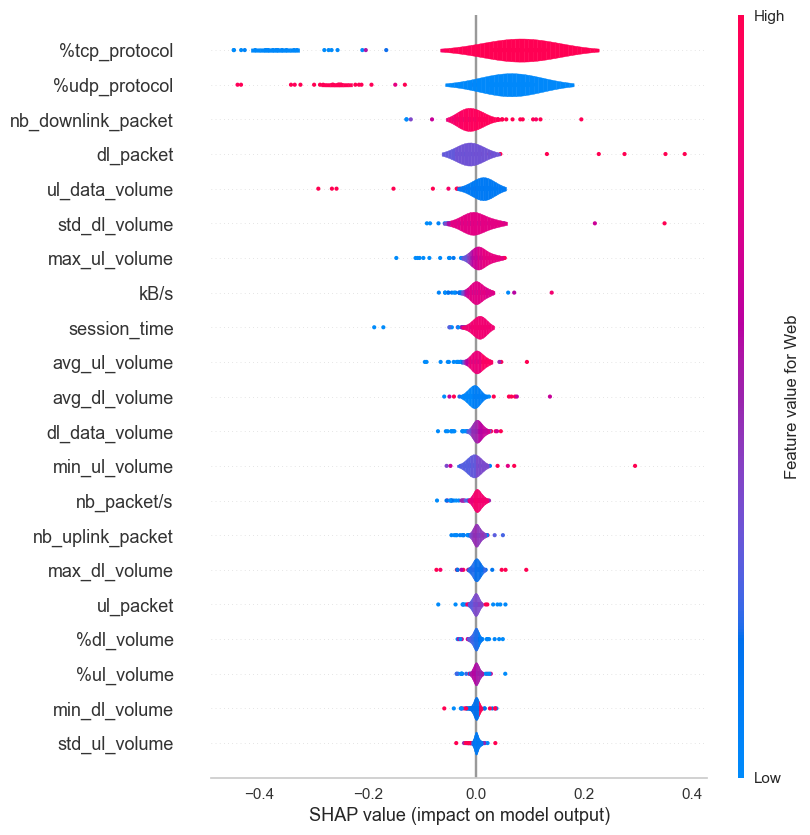

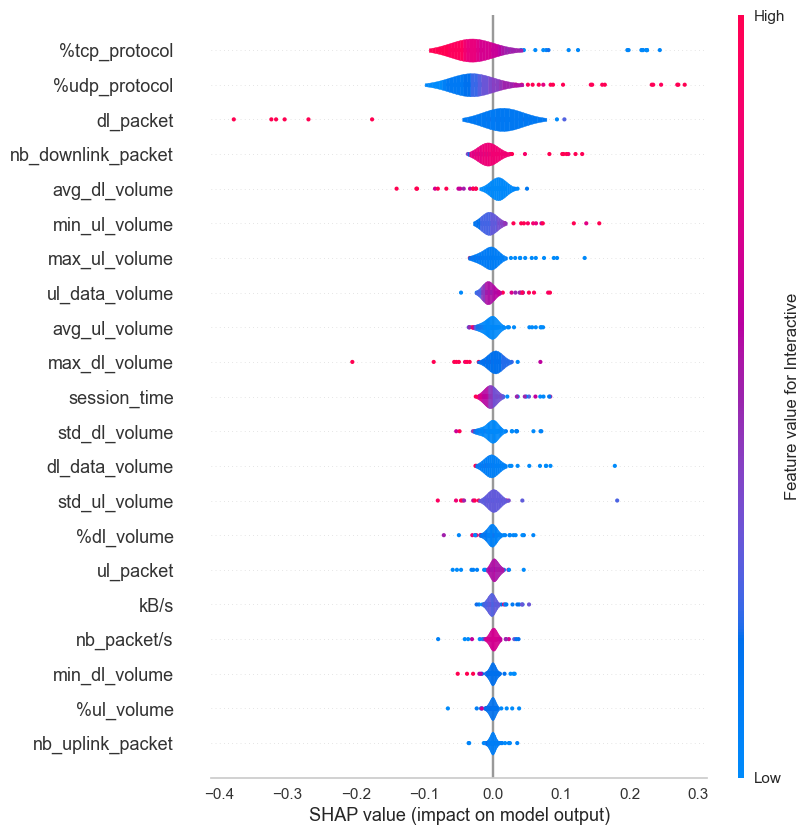

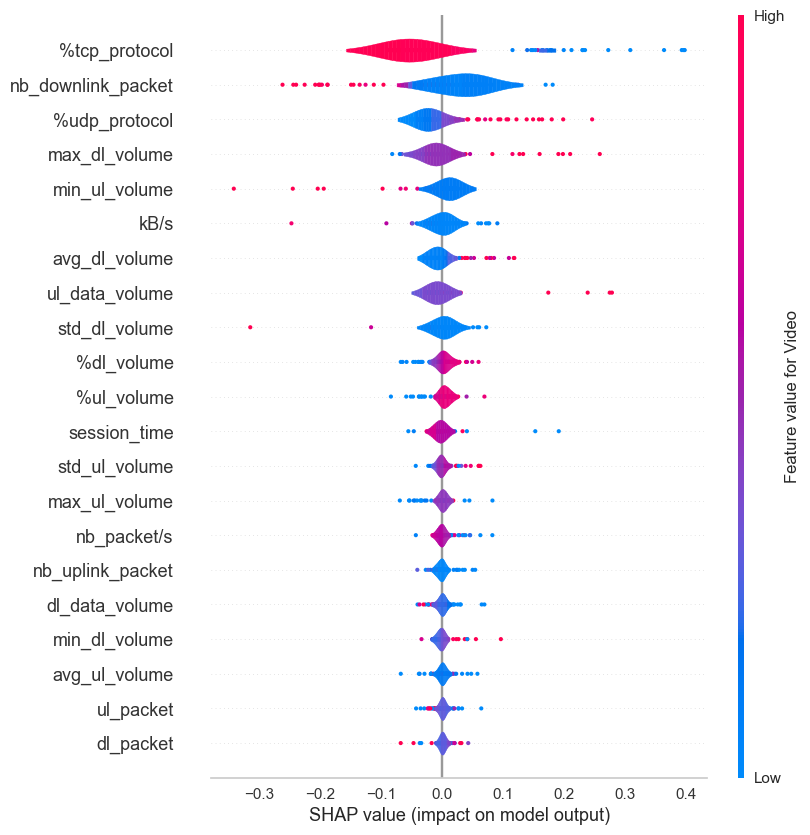

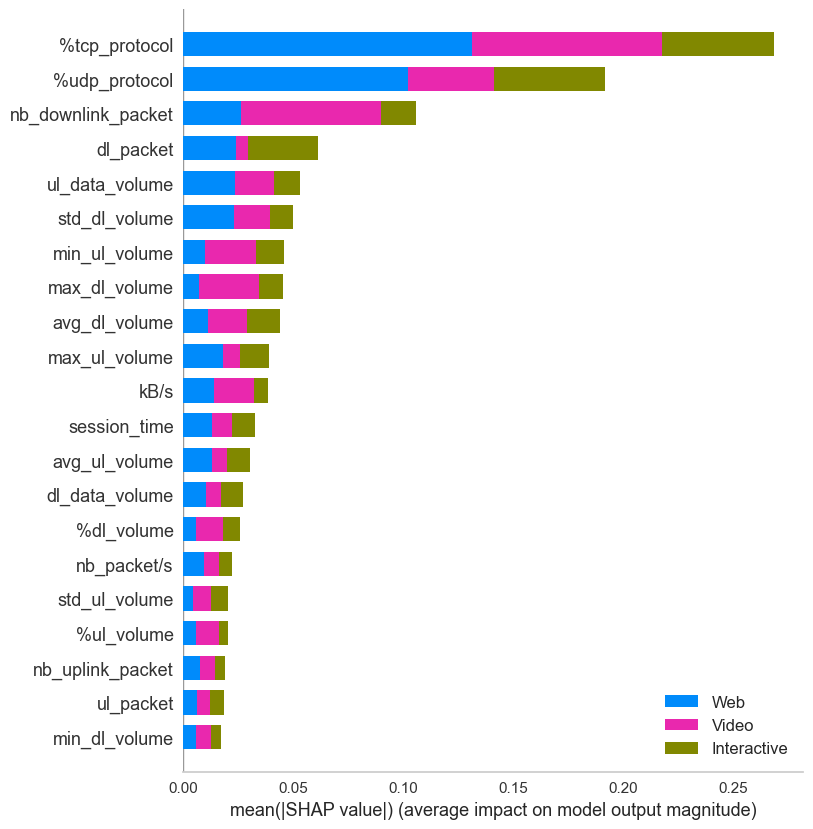

In [90]:
from pydoc import classname
import warnings
import shap

classes=['Web', 'Interactive', 'Video']
explainer = shap.KernelExplainer(keras_model.predict, X_test)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    shap_values = explainer.shap_values(X_test, nsamples=len(X_test))
#print(shap_values)

plt.grid(b=None)
shap.summary_plot(shap_values[0], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Web', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values[1], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Interactive', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values[2], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Video', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values, X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for all')

### LIME method

In [101]:
import lime
import random
from lime import lime_tabular

# Interesting case: idx = 10 is Web, but the model predicted Video
idx = random.randint(0, len(X_test)) 
print("Local interpretation of sample " + str(idx))
print("Prediction : ", keras_model.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", y_test[idx])

classes=['Web', 'Interactive', 'Video']
predict_fn_nn= lambda x: keras_model.predict(x)
explainer = lime_tabular.LimeTabularExplainer(X_test, mode="classification", feature_names=features, feature_selection= 'auto',
                                                kernel_width=None, discretize_continuous=True, class_names=classes)
explanation = explainer.explain_instance(X_test[idx], predict_fn_nn, num_features=len(features), top_labels=3)
#explanation.as_pyplot_figure()

plt.tight_layout()
explanation.show_in_notebook()

Local interpretation of sample 10
1/1 [==============================] - 0s 25ms/step
Prediction :  [[5.6276005e-02 1.5847805e-04 8.4854156e-01]]
Actual :      [1 0 0]
157/157 [==============================] - 0s 838us/step



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


<Figure size 800x550 with 0 Axes>

# XGBoost
## Training the XGBoost model

In [72]:
from xgboost import XGBClassifier

xgbc_model = XGBClassifier()
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Testing the XGBoost model

Mean cross-validation score: 0.95
K-fold CV average score: 0.94
Confusion matrix: 
[[93  0  1]
 [ 1 10  0]
 [ 3  0  7]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       1.00      0.91      0.95        11
           2       0.88      0.70      0.78        10

   micro avg       0.98      0.96      0.97       115
   macro avg       0.95      0.87      0.91       115
weighted avg       0.98      0.96      0.97       115
 samples avg       0.96      0.96      0.96       115


Accuracy: 0.96



Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


Text(0.5, 1.0, 'Confusion Matrix of XGBoost')

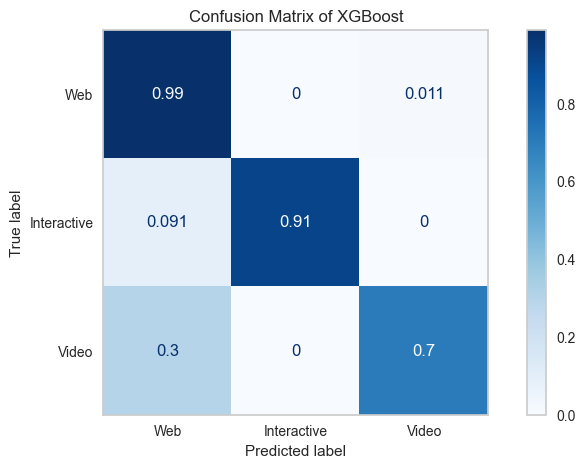

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scores = cross_val_score(xgbc_model, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# make sure the SHAP values add up to marginal predictions
y_pred = xgbc_model.predict(X_test, output_margin=True)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix: \n" + str(cm))
print(classification_report(y_test, y_pred))
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

labels = ["Web", "Interactive", "Video"]
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
disp.plot(cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title("Confusion Matrix of XGBoost")

## XAI of XGBoost model
### SHAP method using KernelExplainer

In [75]:
from pydoc import classname
import warnings
import shap

classes=['Web', 'Interactive', 'Video']
explainer = shap.KernelExplainer(xgbc_model.predict, X_test)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    shap_values = explainer.shap_values(X_test, nsamples=len(X_test))
#print(shap_values)

Using 115 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 115/115 [00:22<00:00,  5.12it/s]


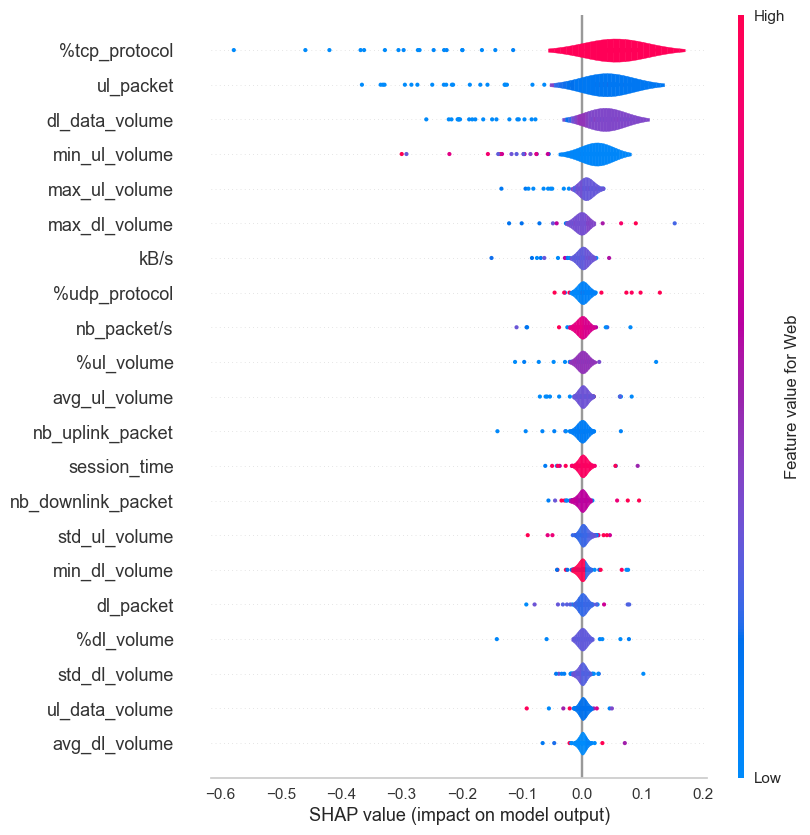

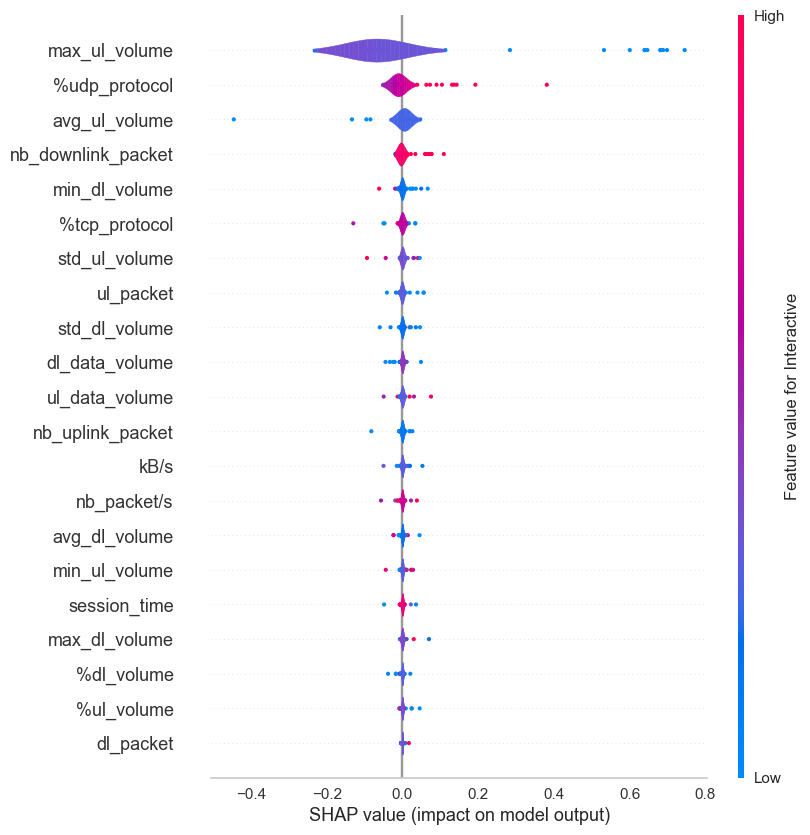

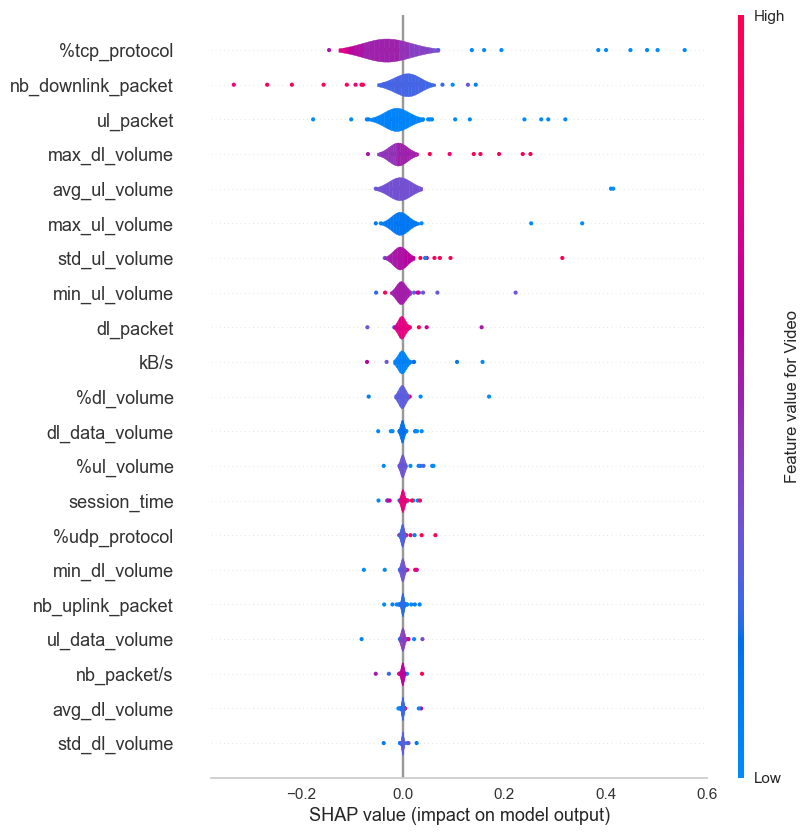

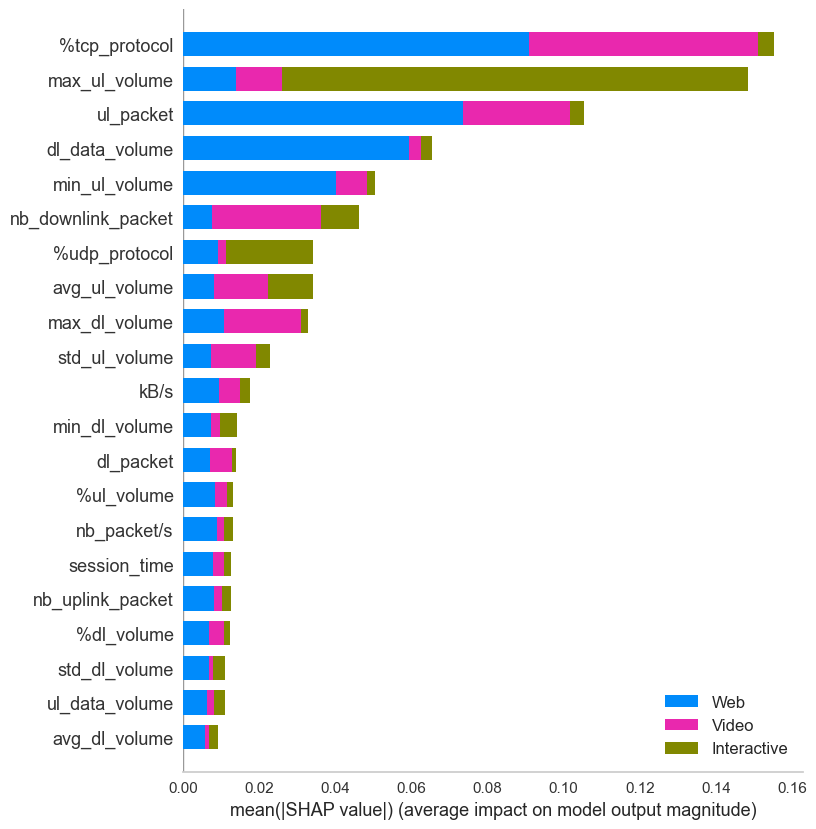

In [76]:
plt.grid(b=None)
shap.summary_plot(shap_values[0], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Web', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values[1], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Interactive', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values[2], X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for Video', plot_type="violin")
plt.grid(b=None)
shap.summary_plot(shap_values, X_test, feature_names=features, max_display=21, 
                    class_names=classes, color_bar_label='Feature value for all')

# LightGBM model
## Training the LightGBM model

In [104]:
import lightgbm as ltb

lgbm_model = ltb.LGBMClassifier()
lgbm_model.fit(X_train, y_train_orig)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LGBMClassifier()

## Testing the LightGBM model

r_2 score: 0.953100
mean_squared_log_error score: 0.002149
Confusion matrix: 
[[94  0  0]
 [ 1  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        94
           2       1.00      0.82      0.90        11
           3       0.91      1.00      0.95        10

    accuracy                           0.98       115
   macro avg       0.97      0.94      0.95       115
weighted avg       0.98      0.98      0.98       115


Accuracy: 0.98



Text(0.5, 1.0, 'Confusion Matrix of LightGBM')

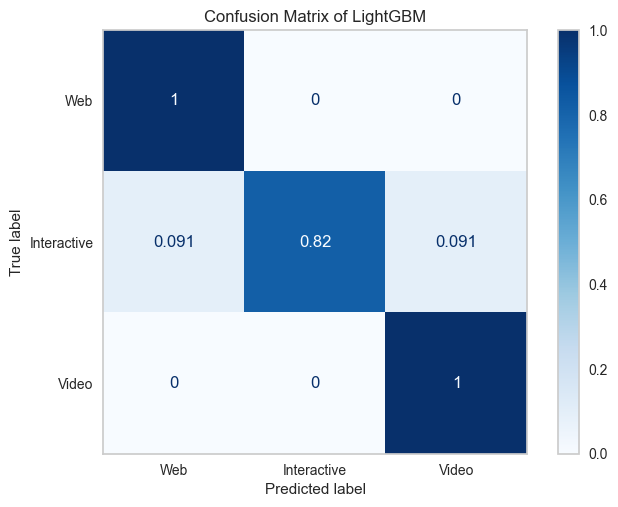

In [131]:
#Y_expected = testing_dataset.iloc[:,21]
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lgbm_model.predict(X_test)
#y_pred = (y_pred > 0.5) 

r_2_score = metrics.r2_score(y_test_orig, y_pred)
mean_squared_log_error_score = metrics.mean_squared_log_error(y_test_orig, y_pred)
print("r_2 score: %f" % (r_2_score))
print("mean_squared_log_error score: %f" % (mean_squared_log_error_score))

cm = confusion_matrix(y_test_orig, y_pred)
print("Confusion matrix: \n" + str(cm))
print(classification_report(y_test_orig, y_pred))
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_orig, y_pred)))

labels = ["Web", "Interactive", "Video"]
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
disp.ax_.set_title("Confusion Matrix of LightGBM")